--
 

## Project: Job Application Analysis and Visualization  

This project analyzes a dataset of job applications, applicants, and job titles. The purpose of this project is to identify which job titles received multiple applications and to visualize the data. Using Python and various visualization libraries such as `folium` and `matplotlib`, it explores trends and patterns in job applications across different roles and locations. Key insights include the distribution of applications across job titles, applicant experience, and geographic clustering of applicants.

### Visualizations:

1. **Distribution of Years of Experience Among Applicants**  
   This histogram displays the distribution of the applicants’ years of experience, showing how the workforce is distributed in terms of experience levels.

2. **Distribution of Number of Applications per Job Title**  
   A bar plot that demonstrates how the number of applications is distributed across different job titles, highlighting which jobs receive more or fewer applications.

3. **Top 10 Job Titles with the Most Applications**  
   A bar plot showcasing the top 10 job titles that received the most applications, indicating the most popular job roles among the applicant pool.

4. **Average Years of Experience vs Number of Applications**  
   A scatter plot that shows the relationship between the average years of experience of applicants and the number of applications for each job title.

5. **Geographic Distribution of Applicants (Heatmap)**  
   A heatmap displaying the geographic locations of applicants, allowing for easy visualization of applicant concentrations across different regions.

6. **Marker Cluster Map of Applicants**  
   A marker cluster map that dynamically groups applicant locations based on their proximity, making it easier to explore geographic data without overcrowding the map.

7. **Applications by Job Category**  
   A bar plot categorizing the applications by job type (e.g., technical, managerial, administrative) to highlight which job categories are most popular.

8. **Citizenship Status of Applicants**  
   A pie chart that breaks down the percentage of U.S. citizens and non-U.S. citizens among the applicants, providing insights into  know if you'd like any further tweaks! the most applicants.


In [1]:
import os

In [2]:
import json

In [3]:
import csv

In [4]:
import uuid

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [81]:
!pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   -------------- ------------------------ 41.0/108.4 kB 487.6 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 785.4 kB/s eta 0:00:00


**The json files are being loaded into the variable 'all_data' and then it is converted into a dataframe**

In [7]:
def parse_json(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            filepath = os.path.join(directory, filename)
            with open(filepath,'r') as file:
                data = json.load(file)
                all_data.append(data)
    return all_data

In [8]:
all_data = parse_json("applicants/applicants")

In [9]:
df = pd.DataFrame(all_data)
df.head()

id first_name  last_name                  email  years_experience  \
0  1001    Margaux    Monkley  mmonkley0@samsung.com                13   
1  1002      Devan  Wrathmall     dwrathmall1@goo.gl                16   
2  1003       King       Ygou        kygou2@ehow.com                11   
3  1004    Giffard    Cockitt  gcockitt3@pcworld.com                13   
4  1005    Gianina     Mowatt      gmowatt4@gmpg.org                 3   

    latitude   longitude  python_years  pandas_years  us_citizen  \
0  51.498695   -0.155017           5.0           4.0       False   
1 -19.820532  -40.276821           6.0           5.0        True   
2 -12.259727  -38.964661           7.0           5.0        True   
3  15.901640  120.587828           3.0           3.0       False   
4  30.134451  114.829374          14.0           1.0       False   

                        job_applied_for  highest_ed date_applied  
0  Business Systems Development Analyst          16   2022-03-14  
1                  Safety Technician IV          13   2022-06-07  
2           Administrative Assistant II          13   2021-08-07  
3                 Chief Design Engineer          14   2022-06-11  
4                                 Nurse          13   2022-05-20

**Here, a new dataframe called job_titles is being created from the original dataframe while dropping the duplicates, and then a unique job_id is also being created.**

In [10]:
job_titles = df[['job_applied_for']].drop_duplicates().reset_index(drop=True)
	


In [11]:
job_titles['job_id']=[str(uuid.uuid4()) for _ in range(len(job_titles))]

In [12]:
job_titles

job_applied_for  \
0    Business Systems Development Analyst   
1                    Safety Technician IV   
2             Administrative Assistant II   
3                   Chief Design Engineer   
4                                   Nurse   
..                                    ...   
190              Database Administrator I   
191                          Engineer III   
192                    Biostatistician II   
193           Administrative Assistant IV   
194                     Biostatistician I   

                                   job_id  
0    20efd695-1071-4aae-bf02-453f6af6d87a  
1    2ca52ece-5623-42e0-9d78-c99e78c72205  
2    261ce91a-c004-446e-9da2-f6cd970c51c9  
3    30ac9644-fbb2-49de-ba5b-ae7c6e3fce21  
4    b9026852-ebf3-4517-b094-4653ac7ab1ee  
..                                    ...  
190  3c581637-209c-44b9-9494-5158f417f894  
191  00151ceb-2ef3-445f-b928-ce3172277199  
192  d14580df-9b5c-4c2e-b9ec-18b7ef571d37  
193  1af3c4f6-01a4-4963-be3e-f225d7705152  
194  0736e3e7-7965-4d3d-b2c0-305b7aa257e6  

[195 rows x 2 columns]

**A dictionary is being created to map job titles with job id so that it would be easier to merge the dataframe 'job_titles' to the original dataframe so that the dataframe 'job_applications' can created as it needs both the job_id and application_id to be linked to the dataframes 'job_titles' and 'applicants'**

In [13]:
job_title_to_job_id = dict(zip(job_titles['job_applied_for'], job_titles['job_id']))
print(job_title_to_job_id)

{'Business Systems Development Analyst': '20efd695-1071-4aae-bf02-453f6af6d87a', 'Safety Technician IV': '2ca52ece-5623-42e0-9d78-c99e78c72205', 'Administrative Assistant II': '261ce91a-c004-446e-9da2-f6cd970c51c9', 'Chief Design Engineer': '30ac9644-fbb2-49de-ba5b-ae7c6e3fce21', 'Nurse': 'b9026852-ebf3-4517-b094-4653ac7ab1ee', 'Tax Accountant': '1e44fba5-98df-4930-af45-2fa1a9933c8d', 'Accounting Assistant I': '63d39725-6f16-44ab-82ff-45d416d18156', 'Internal Auditor': '9d1502a1-99bb-41eb-ac57-bb9c642248f1', 'Account Executive': 'b63ac5e4-cb4b-43a9-9ef1-4bd0fcf3536c', 'Speech Pathologist': '62b4b5d2-e04a-4091-b852-b64f8be180b4', 'Engineer IV': '20ef82bc-368d-4b6f-acdc-2b5a150bf98e', 'Director of Sales': 'd8022eea-9274-462c-ad3a-d0a87628ddd2', 'Teacher': 'fc5aa1d5-8f12-4198-8b9f-e52bdc3ce1e1', 'Graphic Designer': '2dc85214-f820-41c2-88aa-5a3a9627d3d4', 'Staff Accountant II': '660392c0-2446-44bf-a5dd-44eea384c4e3', 'Programmer III': 'e4ed16d4-02c0-44b8-8eea-a47d25fe08bc', 'VP Accounting'

In [14]:
df['job_id'] = df['job_applied_for'].map(job_title_to_job_id)

In [15]:
df

id first_name  last_name                          email  \
0     1001    Margaux    Monkley          mmonkley0@samsung.com   
1     1002      Devan  Wrathmall             dwrathmall1@goo.gl   
2     1003       King       Ygou                kygou2@ehow.com   
3     1004    Giffard    Cockitt          gcockitt3@pcworld.com   
4     1005    Gianina     Mowatt              gmowatt4@gmpg.org   
...    ...        ...        ...                            ...   
4995  5996     Kerrie   Giordano             kgiordanorn@pen.io   
4996  5997      Sylas  Cherrison  scherrisonro@odnoklassniki.ru   
4997  5998   Petronia    Losebie   plosebierp@elegantthemes.com   
4998  5999    Mozelle     Boddie           mboddierq@devhub.com   
4999  6000     Walker    Wraxall          wwraxallrr@forbes.com   

      years_experience   latitude   longitude  python_years  pandas_years  \
0                   13  51.498695   -0.155017           5.0           4.0   
1                   16 -19.820532  -40.276821           6.0           5.0   
2                   11 -12.259727  -38.964661           7.0           5.0   
3                   13  15.901640  120.587828           3.0           3.0   
4                    3  30.134451  114.829374          14.0           1.0   
...                ...        ...         ...           ...           ...   
4995                16  28.150410  115.667833           8.0           1.0   
4996                11   7.376061  151.884392           1.0           1.0   
4997                 4  52.149096   34.490340          14.0           4.0   
4998                 6  28.693048  107.345882           4.0           1.0   
4999                12  41.987032   21.436286          13.0           2.0   

      us_citizen                       job_applied_for  highest_ed  \
0          False  Business Systems Development Analyst          16   
1           True                  Safety Technician IV          13   
2           True           Administrative Assistant II          13   
3          False                 Chief Design Engineer          14   
4          False                                 Nurse          13   
...          ...                                   ...         ...   
4995       False                   Staff Accountant IV          15   
4996       False                   Account Coordinator          16   
4997       False                       Cost Accountant          15   
4998       False                   Staff Accountant IV          13   
4999        True                Research Assistant III          16   

     date_applied                                job_id  
0      2022-03-14  20efd695-1071-4aae-bf02-453f6af6d87a  
1      2022-06-07  2ca52ece-5623-42e0-9d78-c99e78c72205  
2      2021-08-07  261ce91a-c004-446e-9da2-f6cd970c51c9  
3      2022-06-11  30ac9644-fbb2-49de-ba5b-ae7c6e3fce21  
4      2022-05-20  b9026852-ebf3-4517-b094-4653ac7ab1ee  
...           ...                                   ...  
4995   2021-12-20  95a8c911-627a-4a22-8317-7f8ff6bbcd46  
4996   2021-10-18  7768869a-7148-4c9e-9a0f-dd183f77ecea  
4997   2021-08-27  5ba9c9c0-41ba-451a-832e-9a97aa9fb723  
4998   2021-12-26  95a8c911-627a-4a22-8317-7f8ff6bbcd46  
4999   2021-12-12  7fb5ffaf-a39a-4e32-87ad-78cfec34d76c  

[5000 rows x 14 columns]

In [16]:
print(df.dtypes)

id                    int64
first_name           object
last_name            object
email                object
years_experience      int64
latitude            float64
longitude           float64
python_years        float64
pandas_years        float64
us_citizen             bool
job_applied_for      object
highest_ed            int64
date_applied         object
job_id               object
dtype: object


In [17]:
print(df.columns)

Index(['id', 'first_name', 'last_name', 'email', 'years_experience',
       'latitude', 'longitude', 'python_years', 'pandas_years', 'us_citizen',
       'job_applied_for', 'highest_ed', 'date_applied', 'job_id'],
      dtype='object')


**Now, the three dataframes are being created out of the original dataframe except for the job_titles df which I have already created above.**

In [18]:
applicants = df[['id','first_name', 'last_name', 'email', 'years_experience', 'python_years', 'pandas_years', 'latitude', 'longitude', 'us_citizen', 'highest_ed']].drop_duplicates().rename(columns={'id': 'application_id'})
applicants.head()

application_id first_name  last_name                  email  \
0            1001    Margaux    Monkley  mmonkley0@samsung.com   
1            1002      Devan  Wrathmall     dwrathmall1@goo.gl   
2            1003       King       Ygou        kygou2@ehow.com   
3            1004    Giffard    Cockitt  gcockitt3@pcworld.com   
4            1005    Gianina     Mowatt      gmowatt4@gmpg.org   

   years_experience  python_years  pandas_years   latitude   longitude  \
0                13           5.0           4.0  51.498695   -0.155017   
1                16           6.0           5.0 -19.820532  -40.276821   
2                11           7.0           5.0 -12.259727  -38.964661   
3                13           3.0           3.0  15.901640  120.587828   
4                 3          14.0           1.0  30.134451  114.829374   

   us_citizen  highest_ed  
0       False          16  
1        True          13  
2        True          13  
3       False          14  
4       False          13

In [19]:
 job_titles = job_titles.rename(columns={'job_applied_for': 'job_title'})
job_titles

job_title  \
0    Business Systems Development Analyst   
1                    Safety Technician IV   
2             Administrative Assistant II   
3                   Chief Design Engineer   
4                                   Nurse   
..                                    ...   
190              Database Administrator I   
191                          Engineer III   
192                    Biostatistician II   
193           Administrative Assistant IV   
194                     Biostatistician I   

                                   job_id  
0    20efd695-1071-4aae-bf02-453f6af6d87a  
1    2ca52ece-5623-42e0-9d78-c99e78c72205  
2    261ce91a-c004-446e-9da2-f6cd970c51c9  
3    30ac9644-fbb2-49de-ba5b-ae7c6e3fce21  
4    b9026852-ebf3-4517-b094-4653ac7ab1ee  
..                                    ...  
190  3c581637-209c-44b9-9494-5158f417f894  
191  00151ceb-2ef3-445f-b928-ce3172277199  
192  d14580df-9b5c-4c2e-b9ec-18b7ef571d37  
193  1af3c4f6-01a4-4963-be3e-f225d7705152  
194  0736e3e7-7965-4d3d-b2c0-305b7aa257e6  

[195 rows x 2 columns]

In [20]:
job_applications = df[['id','job_id']].rename(columns={'id': 'application_id'})
job_applications.head()

application_id                                job_id
0            1001  20efd695-1071-4aae-bf02-453f6af6d87a
1            1002  2ca52ece-5623-42e0-9d78-c99e78c72205
2            1003  261ce91a-c004-446e-9da2-f6cd970c51c9
3            1004  30ac9644-fbb2-49de-ba5b-ae7c6e3fce21
4            1005  b9026852-ebf3-4517-b094-4653ac7ab1ee

**Saving the DataFrames to csv Files**


In [21]:
applicants.to_csv(os.path.join('applicants','applicants.csv'),index=False)


In [22]:
job_titles.to_csv(os.path.join('applicants', 'job_titles.csv'),index=False)

In [23]:
job_applications.to_csv(os.path.join('applicants','job_applications.csv'),index=False)

In [24]:
applicants.describe()

application_id  years_experience  python_years  pandas_years  \
count     5000.000000        5000.00000   4846.000000   4797.000000   
mean      3500.500000          10.61920      7.980190      3.017719   
std       1443.520003           5.76094      4.298177      1.423581   
min       1001.000000           1.00000      1.000000      1.000000   
25%       2250.750000           6.00000      4.000000      2.000000   
50%       3500.500000          11.00000      8.000000      3.000000   
75%       4750.250000          16.00000     12.000000      4.000000   
max       6000.000000          20.00000     15.000000      5.000000   

          latitude    longitude   highest_ed  
count  5000.000000  5000.000000  5000.000000  
mean     24.950502    44.292162    14.011600  
std      24.312671    70.924450     1.420517  
min     -51.573210  -171.855617    12.000000  
25%       7.950597     3.552204    13.000000  
50%      30.966487    38.914665    14.000000  
75%      44.290001   112.425444    15.000000  
max      69.631860   171.733932    16.000000

In [25]:
job_titles.describe()

job_title  \
count                                    195   
unique                                   195   
top     Business Systems Development Analyst   
freq                                       1   

                                      job_id  
count                                    195  
unique                                   195  
top     20efd695-1071-4aae-bf02-453f6af6d87a  
freq                                       1

In [26]:
job_applications.describe()

application_id
count     5000.000000
mean      3500.500000
std       1443.520003
min       1001.000000
25%       2250.750000
50%       3500.500000
75%       4750.250000
max       6000.000000

## Distribution of Years of Experience Among Applicants

This histogram visualizes the distribution of years of experience among the applicants. It helps in understanding how the applicant pool is distributed in terms of their work experience. By dividing the data into bins, this chart shows how many applicants fall within different ranges of years of experience. This insight is useful for assessing the overall experience level of the applicant pool.


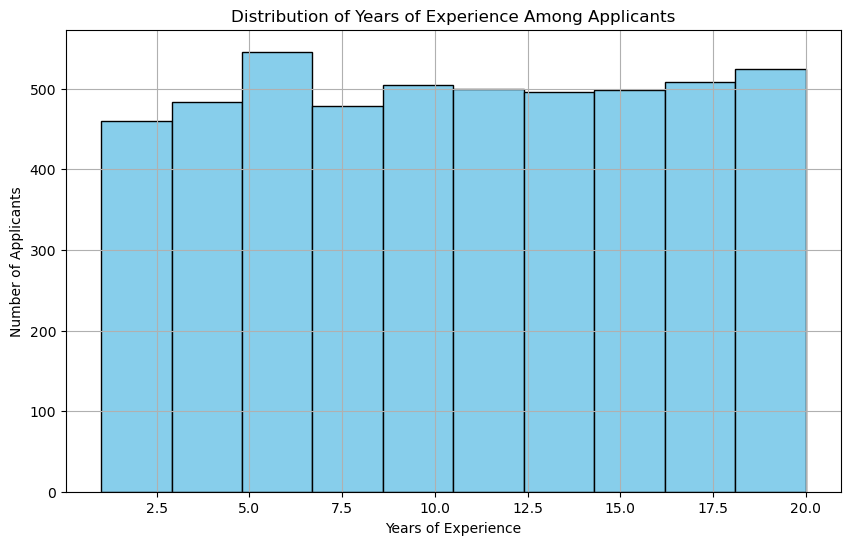

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(applicants['years_experience'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Years of Experience Among Applicants')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.show()




## A new dataframe is being created to keep track of multiple job applications to the same job.

In [28]:
job_application_counts = job_applications.groupby('job_id').size().reset_index(name='application_count')


job_application_counts = job_application_counts.merge(job_titles, on='job_id', how='left')
job_application_counts

job_id  application_count  \
0    00151ceb-2ef3-445f-b928-ce3172277199                  6   
1    012a38fc-b41a-4ebe-a6a4-b4a6fed9f7b9                 16   
2    01aef364-2e05-44e2-a606-64ae4faa7214                  9   
3    04959c29-b39d-41a3-b5ec-49f93cbf6853                 37   
4    051f29f0-d66a-451a-9c47-cace22a02cff                  3   
..                                    ...                ...   
190  fdaa56e7-dbb6-4567-82d5-e88677dfc25d                 34   
191  fe1b6973-68e8-47b7-a8a7-aae0c76afd75                 42   
192  fe4a7607-8824-4306-8c4d-7992664d9aa6                 11   
193  feee5552-6826-4a79-8bc3-ca3e38d18ff4                  4   
194  ffcfe176-6c06-4cb4-9722-8807b4e59243                  9   

                         job_title  
0                     Engineer III  
1                  Statistician II  
2        Automation Specialist III  
3               Analyst Programmer  
4     Budget/Accounting Analyst II  
..                             ...  
190              Assistant Manager  
191  Community Outreach Specialist  
192      Database Administrator IV  
193                 Accountant III  
194             Biostatistician IV  

[195 rows x 3 columns]

In [29]:
jobs_with_multiple_apps = job_application_counts[job_application_counts['application_count'] > 1]

jobs_with_multiple_apps

job_id  application_count  \
0    00151ceb-2ef3-445f-b928-ce3172277199                  6   
1    012a38fc-b41a-4ebe-a6a4-b4a6fed9f7b9                 16   
2    01aef364-2e05-44e2-a606-64ae4faa7214                  9   
3    04959c29-b39d-41a3-b5ec-49f93cbf6853                 37   
4    051f29f0-d66a-451a-9c47-cace22a02cff                  3   
..                                    ...                ...   
190  fdaa56e7-dbb6-4567-82d5-e88677dfc25d                 34   
191  fe1b6973-68e8-47b7-a8a7-aae0c76afd75                 42   
192  fe4a7607-8824-4306-8c4d-7992664d9aa6                 11   
193  feee5552-6826-4a79-8bc3-ca3e38d18ff4                  4   
194  ffcfe176-6c06-4cb4-9722-8807b4e59243                  9   

                         job_title  
0                     Engineer III  
1                  Statistician II  
2        Automation Specialist III  
3               Analyst Programmer  
4     Budget/Accounting Analyst II  
..                             ...  
190              Assistant Manager  
191  Community Outreach Specialist  
192      Database Administrator IV  
193                 Accountant III  
194             Biostatistician IV  

[195 rows x 3 columns]

## Jobs with mutiple applications

In [30]:
print("Jobs with more than one application:")
print(jobs_with_multiple_apps[['job_title','application_count']])

Jobs with more than one application:
                         job_title  application_count
0                     Engineer III                  6
1                  Statistician II                 16
2        Automation Specialist III                  9
3               Analyst Programmer                 37
4     Budget/Accounting Analyst II                  3
..                             ...                ...
190              Assistant Manager                 34
191  Community Outreach Specialist                 42
192      Database Administrator IV                 11
193                 Accountant III                  4
194             Biostatistician IV                  9

[195 rows x 2 columns]


In [31]:
jobs_with_multiple_apps_dict = jobs_with_multiple_apps.set_index('job_title')['application_count'].to_dict()


print("Jobs with more than one application:")
print(jobs_with_multiple_apps_dict)


Jobs with more than one application:
{'Engineer III': 6, 'Statistician II': 16, 'Automation Specialist III': 9, 'Analyst Programmer': 37, 'Budget/Accounting Analyst II': 3, 'Biostatistician I': 11, 'Nurse Practicioner': 40, 'Media Manager IV': 16, 'Sales Representative': 67, 'Payment Adjustment Coordinator': 50, 'Administrative Officer': 51, 'Sales Associate': 40, 'Programmer Analyst II': 12, 'Developer IV': 7, 'VP Sales': 39, 'Recruiting Manager': 59, 'Help Desk Technician': 47, 'Web Designer I': 9, 'Desktop Support Technician': 43, 'Administrative Assistant III': 8, 'Administrative Assistant IV': 5, 'Legal Assistant': 49, 'Computer Systems Analyst IV': 23, 'Tax Accountant': 32, 'Engineer IV': 20, 'Business Systems Development Analyst': 53, 'Statistician I': 11, 'Administrative Assistant II': 12, 'Budget/Accounting Analyst IV': 9, 'Project Manager': 43, 'Structural Analysis Engineer': 51, 'Safety Technician IV': 9, 'Electrical Engineer': 42, 'Graphic Designer': 41, 'Chief Design Engin

**Distribution of Number of Applications per Job Title**:
A barchart showing the distribution of the number of applications per job title. This helps to visualize whether most job titles receive a similar number of applications or if there are outliers that attract significantly more applicants than others.

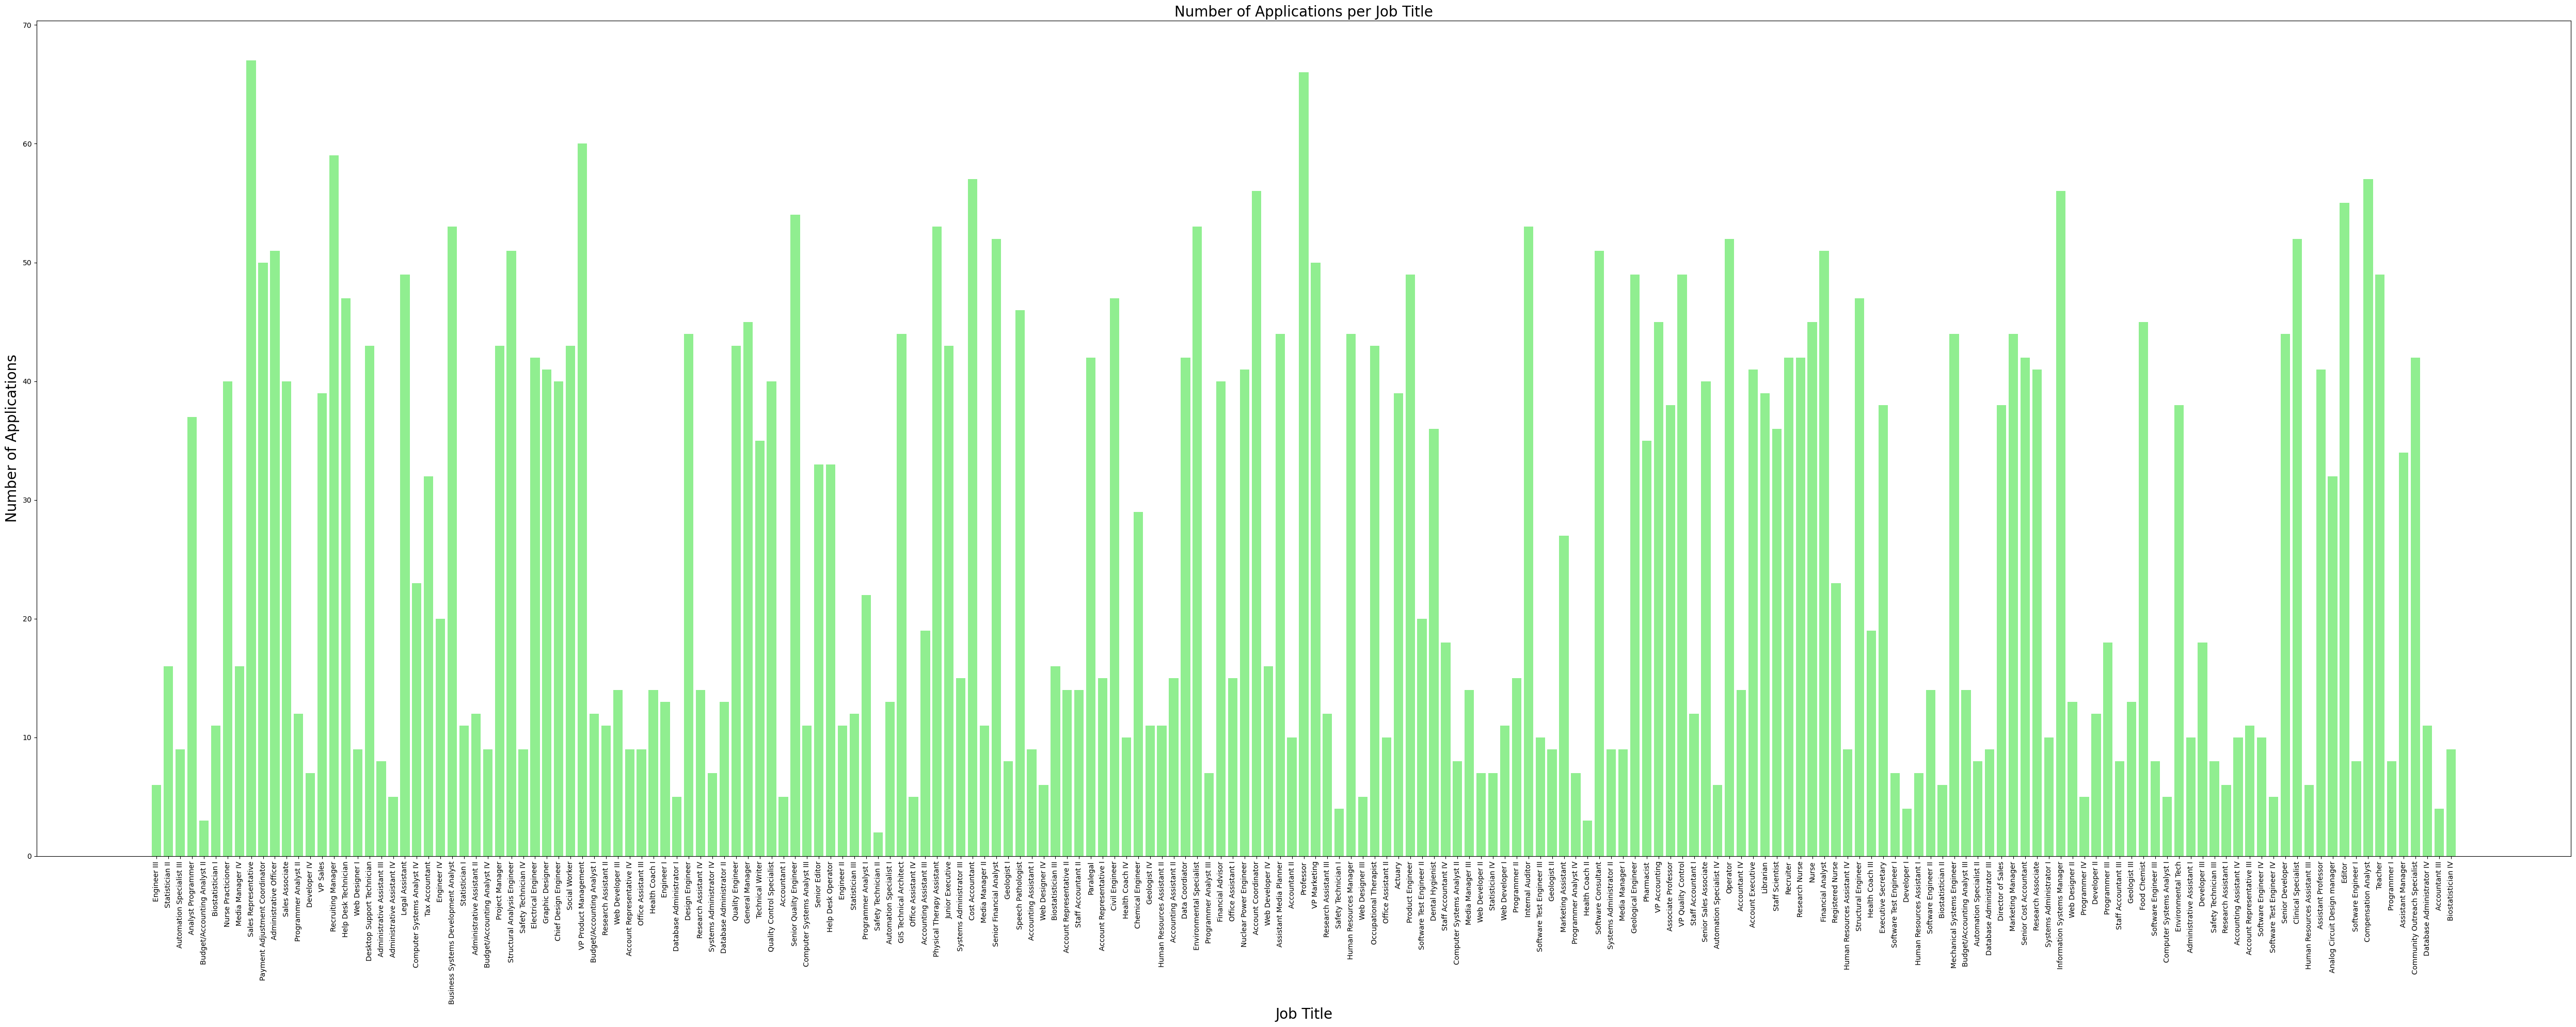

In [32]:
plt.figure(figsize=(50, 20))
plt.bar(job_application_counts['job_title'], job_application_counts['application_count'], color='lightgreen')
plt.title('Number of Applications per Job Title',fontsize=20)
plt.xlabel('Job Title',fontsize=20)
plt.ylabel('Number of Applications',fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


 **Top 20 Job Titles with the Most Applications**:
The bar plot highlights the top job titles that received the most applications. By focusing on the most popular job titles, we can identify which roles attract the highest interest from applicants. This visualization is helpful for understanding which job types are in high demand.


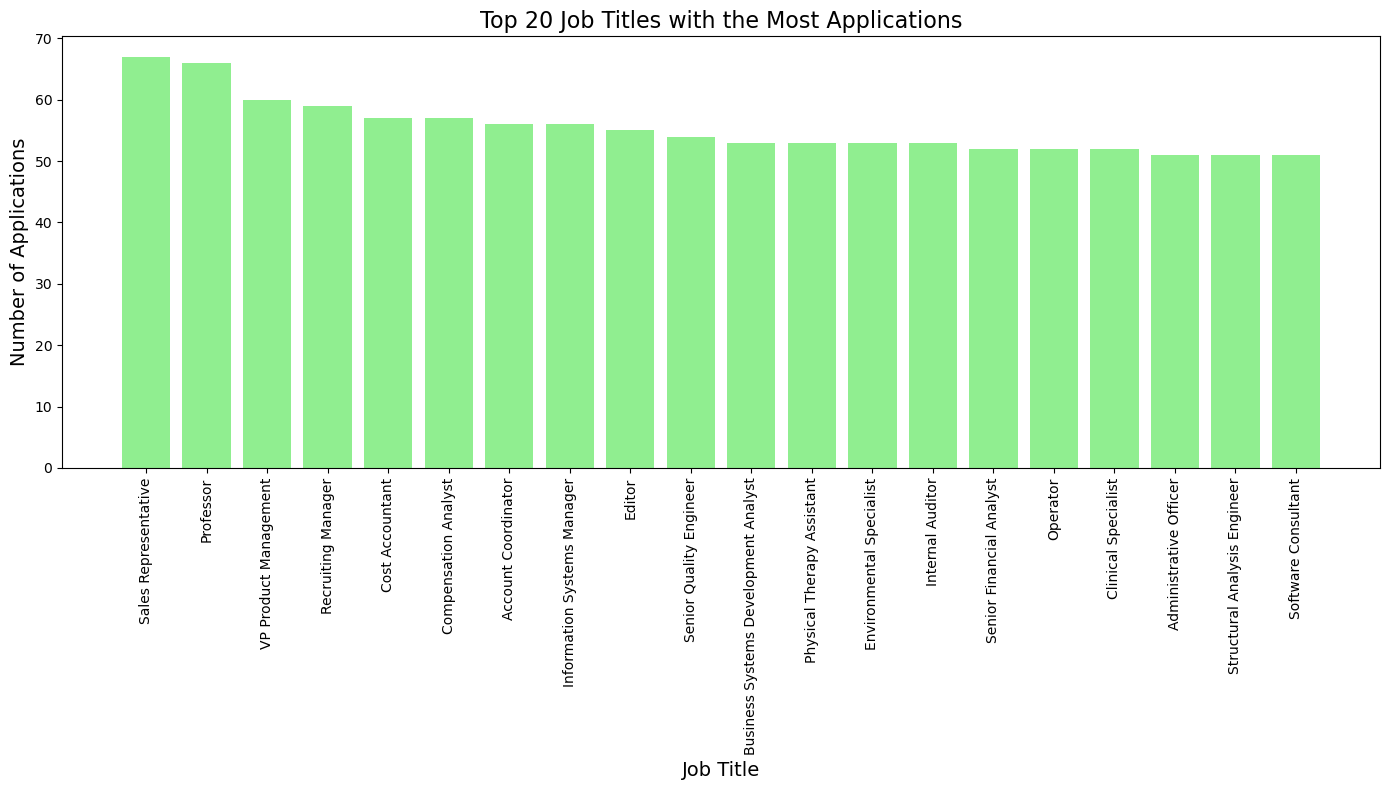

In [33]:

top_n = 20
top_jobs = job_application_counts.nlargest(top_n, 'application_count')

plt.figure(figsize=(14, 8))
plt.bar(top_jobs['job_title'], top_jobs['application_count'], color='lightgreen')
plt.title(f'Top {top_n} Job Titles with the Most Applications', fontsize=16)
plt.ylabel('Number of Applications', fontsize=14)
plt.xlabel('Job Title', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [34]:
experience_vs_applications = df.groupby('job_id').agg({
    'years_experience': 'mean',
    'id': 'count'
}).reset_index()

experience_vs_applications

job_id  years_experience  id
0    00151ceb-2ef3-445f-b928-ce3172277199         11.000000   6
1    012a38fc-b41a-4ebe-a6a4-b4a6fed9f7b9         10.875000  16
2    01aef364-2e05-44e2-a606-64ae4faa7214         11.444444   9
3    04959c29-b39d-41a3-b5ec-49f93cbf6853         10.891892  37
4    051f29f0-d66a-451a-9c47-cace22a02cff          7.000000   3
..                                    ...               ...  ..
190  fdaa56e7-dbb6-4567-82d5-e88677dfc25d          9.705882  34
191  fe1b6973-68e8-47b7-a8a7-aae0c76afd75         10.523810  42
192  fe4a7607-8824-4306-8c4d-7992664d9aa6         12.545455  11
193  feee5552-6826-4a79-8bc3-ca3e38d18ff4         10.750000   4
194  ffcfe176-6c06-4cb4-9722-8807b4e59243         12.222222   9

[195 rows x 3 columns]

In [35]:
experience_vs_applications = experience_vs_applications.merge(job_titles, on='job_id',how='left')
experience_vs_applications

job_id  years_experience  id  \
0    00151ceb-2ef3-445f-b928-ce3172277199         11.000000   6   
1    012a38fc-b41a-4ebe-a6a4-b4a6fed9f7b9         10.875000  16   
2    01aef364-2e05-44e2-a606-64ae4faa7214         11.444444   9   
3    04959c29-b39d-41a3-b5ec-49f93cbf6853         10.891892  37   
4    051f29f0-d66a-451a-9c47-cace22a02cff          7.000000   3   
..                                    ...               ...  ..   
190  fdaa56e7-dbb6-4567-82d5-e88677dfc25d          9.705882  34   
191  fe1b6973-68e8-47b7-a8a7-aae0c76afd75         10.523810  42   
192  fe4a7607-8824-4306-8c4d-7992664d9aa6         12.545455  11   
193  feee5552-6826-4a79-8bc3-ca3e38d18ff4         10.750000   4   
194  ffcfe176-6c06-4cb4-9722-8807b4e59243         12.222222   9   

                         job_title  
0                     Engineer III  
1                  Statistician II  
2        Automation Specialist III  
3               Analyst Programmer  
4     Budget/Accounting Analyst II  
..                             ...  
190              Assistant Manager  
191  Community Outreach Specialist  
192      Database Administrator IV  
193                 Accountant III  
194             Biostatistician IV  

[195 rows x 4 columns]

**Average Years of Experience vs Number of Applications**:
This scatter plot explores the relationship between the average years of experience of applicants for each job and the number of applications that job received. The visualization helps determine if more experienced candidates are drawn to certain types of jobs and if job popularity correlates with applicant experience.


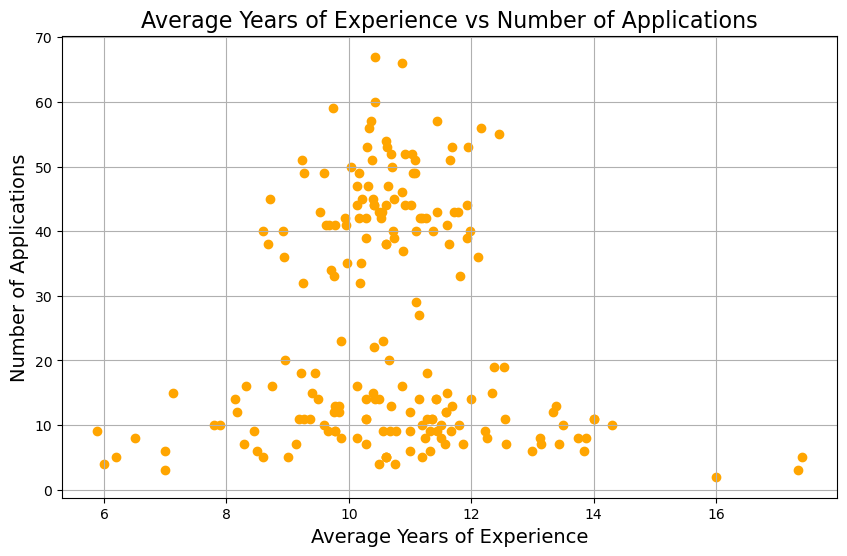

In [36]:


plt.figure(figsize=(10, 6))
plt.scatter(experience_vs_applications['years_experience'], experience_vs_applications['id'], color='orange')
plt.title('Average Years of Experience vs Number of Applications', fontsize=16)
plt.xlabel('Average Years of Experience', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)
plt.grid(True)
plt.show()

**Geographic Distribution of Applicants (Heatmap)**:
A heatmap of applicant locations, showing the geographic distribution of applicants across the United States. This visualization helps identify regional trends in job applicants, such as areas with high concentrations of candidates or regions where certain jobs are particularly sought after.


In [83]:
import folium
from folium.plugins import HeatMap

In [106]:

# Create a map centered at the approximate center of your data
m = folium.Map(location=[37.0902, -95.7129], zoom_start=3)  # Higher zoom level (6 or 7)

# Get coordinates of applicants and create heatmap data
heat_data = [[row['latitude'], row['longitude']] for index, row in applicants.iterrows()]

# Add HeatMap layer with a smaller radius and less blur
HeatMap(heat_data, radius=10, blur=8, gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}).add_to(m)



m


**Marker Cluster Map of Applicants**:
A marker cluster map that groups applicants based on their geographic coordinates. As you zoom in, clusters break into individual markers, allowing for an interactive exploration of where job applicants are concentrated. This visualization is ideal for spotting patterns in applicant locations while preventing clutter on the map.

In [111]:
from folium.plugins import MarkerCluster
# Create a map centered at the approximate center of your data
m = folium.Map(location=[37.0902, -95.7129], zoom_start=3)  # Coordinates for the US

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Iterate through the applicants' latitude and longitude, adding each to the cluster
for index, row in applicants.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=f"Applicant {row['email']}").add_to(marker_cluster)


m

**Citizenship Status of Applicants**

This pie chart provides a breakdown of the citizenship status of applicants, showing the proportion of applicants who are U.S. citizens versus non-U.S. citizens. By visualizing this data, we can better understand the diversity of the applicant pool in terms of nationality. The percentages are displayed on the chart, with distinct colors representing U.S. citizens and non-U.S. citizens.


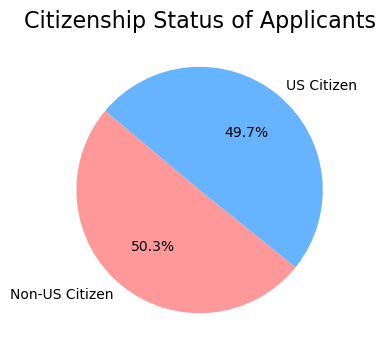

In [37]:

citizen_counts = applicants['us_citizen'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(citizen_counts, labels=['Non-US Citizen', 'US Citizen'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Citizenship Status of Applicants', fontsize=16)
plt.show()
